1- Read the dataset and examine how many features and examples does it have?

The code uses the pandas library to read a CSV file 'cars.csv' into a DataFrame and print the first five rows. The data consists of columns like'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model_year', and 'origin'. The output provides insight into the data structure, potential cleaning needs, and informs further analysis or visualization tasks.

In [108]:
import pandas as pd

# Read the dataset into a DataFrame
file_path = 'cars.csv'
df = pd.read_csv(file_path)

print("The first five rows of the dataset:")
df.head()

The first five rows of the dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


The code snippet uses the shape attribute of a DataFrame to retrieve its dimensions, specifically the number of rows and columns. It shows that the dataset has 398 rows and 8 columns, providing crucial information for understanding its size and structure. This information is essential for data analysis, exploration, visualization, and modeling, as it indicates the size of the dataset.

In [109]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 398 rows and 8 columns.


The code snippet uses the info() method of pandas DataFrame to display data types, non-null counts, and memory usage for a dataset. It shows columns like 'mpg', 'displacement', 'horsepower', and 'acceleration', with 'origin' being of type object. The data also shows the number of non-null values in each column, indicating missing values. This information is crucial for data cleaning and efficient management of large datasets.

In [110]:
print("The dataset information:")
df.info()

The dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


The code uses the describe() method of pandas DataFrame to generate descriptive statistics for each numerical column in the dataset. Key summary statistics include

1- Count: The number of non-null entries for each column.

2- Mean: The average value for each column.

3- Std (Standard Deviation): A measure of the amount of variation or dispersion in a set of values (spread).

4- Min: The minimum value in each column.

5- 25th Percentile (Q1): The value below which 25% of the data falls.

6- Median (50th Percentile or Q2): The middle value of the dataset. It separates the higher half from the lower half.

7- 75th Percentile (Q3): The value below which 75% of the data falls.

8- Max: The maximum value in each column.

These statistics provide a quick overview of the central tendency, dispersion, and range of numerical features in the dataset, helping identify potential outliers, understanding the distribution of values, and making informed decisions about further analysis or preprocessing steps.

In [111]:
print("The dataset description:")
df.describe()

The dataset description:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


2- Are there features with missing values? How many missing values are there in
each one?

The code checks for missing values in DataFrame columns using the isnull() and sum() methods. The results show no missing values in'mpg', 'cylinders', 'displacement', 'weight', 'acceleration', and'model_year' columns. However, six missing values in 'horsepower' and two missing values in 'origin' indicate missing information. Identifying missing values is crucial for data preprocessing and machine learning tasks.

In [112]:
print("The number of missing values in each column:")
df.isnull().sum()


The number of missing values in each column:


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

3- Fill the missing values in each feature using a proper imputation method.

The code imputations missing values in the DataFrame by filling the 'horsepower' and 'origin' columns with the mean and mode values, respectively. This is a common strategy for numerical data and suitable for categorical data. The code then checks for missing values using isnull().sum() to confirm the imputation was successful. Imputation is crucial in data preprocessing, ensuring completeness and suitability for analysis or modeling.

In [113]:
# Fill missing values in the "horsepower" column with the mean
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()


# Fill missing values in the "origin" column with the mode
df['origin'].fillna(df['origin'].mode()[0], inplace=True)

# Verify that there are no more missing values
print("The number of missing values in each column after imputation:")
df.isnull().sum()


The number of missing values in each column after imputation:


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

4- Which country produces cars with better fuel economy?

(Hint: use box plot that shows the mpg for each country (all countries in one plot))

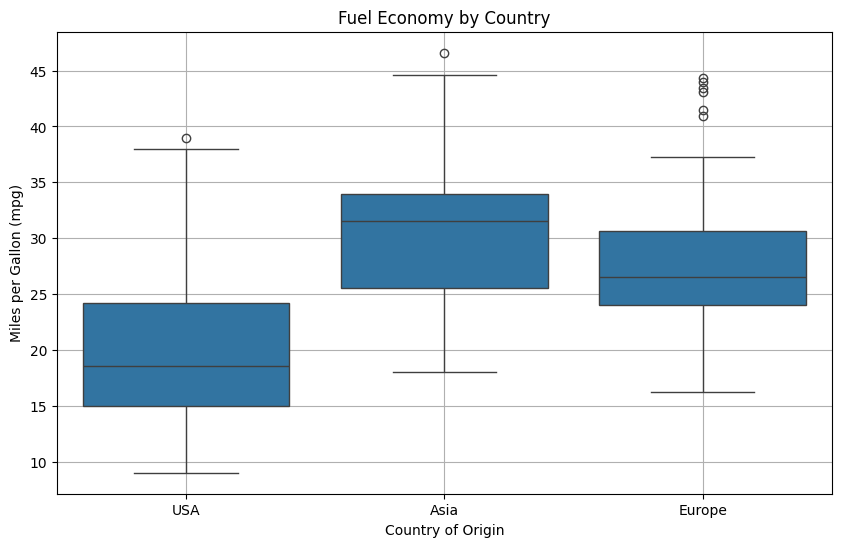

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for mpg by country
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Fuel Economy by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Miles per Gallon (mpg)')
plt.grid()
plt.show()


It can be inferred that cars from Asia tend to have the best fuel economy among the three regions, as indicated by the higher median (32 mpg) and the upper and lower quartiles (box range of 25-35 mpg). In comparison, cars from Europe have a slightly lower median (27 mpg) and a box range of 23-30 mpg, while cars from the USA have the lowest median (19 mpg) and a box range of 15-25 mpg.

Therefore, based on the given box plots:

Asia produces cars with the best fuel economy.
Europe produces cars with a moderately good fuel economy.
The USA produces cars with the lowest fuel economy among the three regions.

5- Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.

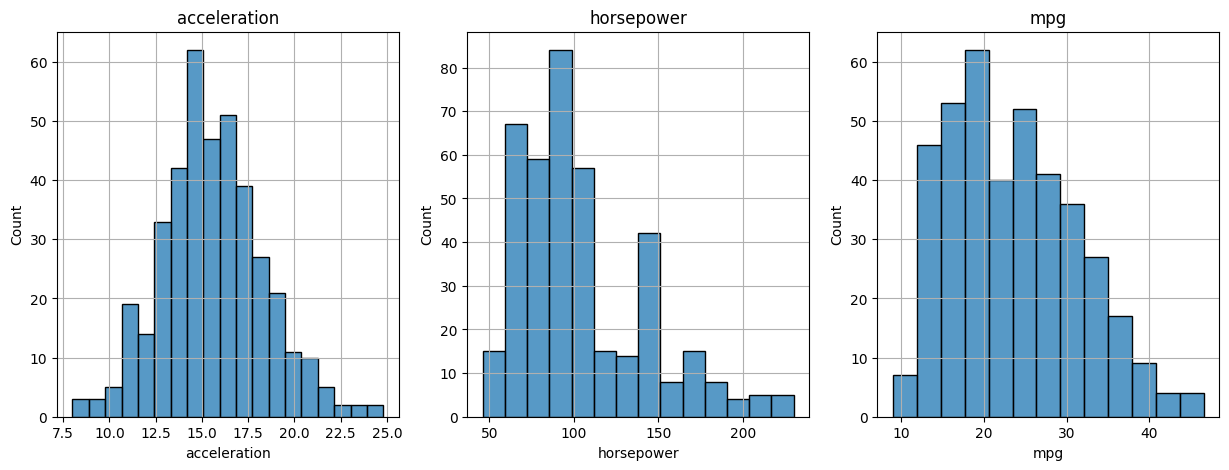

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(['acceleration', 'horsepower', 'mpg']):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].grid()
    


plt.show()


The histogram of acceleration has a distribution that is most similar to a Gaussian (bell-shaped). The histogram of horsepower has a distribution that is somewhat similar to a Gaussian, but it has a slightly longer tail on the right side. The histogram of mpg has a distribution that is least similar to a Gaussian, as it is skewed to the right and has a long tail on the right side.

6- Support your answer for part 5 by using a quantitative measure.

In [116]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for each feature
acceleration_skew = skew(df['acceleration'])
acceleration_kurtosis = kurtosis(df['acceleration'])

horsepower_skew = skew(df['horsepower'])
horsepower_kurtosis = kurtosis(df['horsepower'])

mpg_skew = skew(df['mpg'])
mpg_kurtosis = kurtosis(df['mpg'])

# Print the results
print(f"Acceleration - Skewness: {acceleration_skew:.2f}, Kurtosis: {acceleration_kurtosis:.2f}")
print(f"Horsepower - Skewness: {horsepower_skew:.2f}, Kurtosis: {horsepower_kurtosis:.2f}")
print(f"MPG - Skewness: {mpg_skew:.2f}, Kurtosis: {mpg_kurtosis:.2f}")


Acceleration - Skewness: 0.28, Kurtosis: 0.40
Horsepower - Skewness: 1.09, Kurtosis: 0.73
MPG - Skewness: 0.46, Kurtosis: -0.52


Skewness and kurtosis are measures of the shape of a probability distribution. 

Skewness:

    Negative skewness indicates a left-skewed distribution, with longer or fatter left tails and a majority of data points concentrated on the right side. 

    Positive skewness suggests a right-skewed distribution, with longer or fatter right tails and a majority of data points concentrated on the left side.

    Symmetric skewness indicates a symmetric distribution with equal lengths of left and right tails and evenly distributed data on both sides of the mean. Kurtosis is a measure of the distribution's shape. 

Kurtosis:

    Leptokurtic (Kurtosis > 0) distributions have fatter tails and a sharper peak than normal distributions, indicating heavy tails and increased outliers. 

    Mesokurtic (Kurtosis = 0) distributions have the same kurtosis as normal distributions, with similar tails and peak. 

    Platykurtic (Kurtosis < 0) distributions have thinner tails and flatter peak than normal distributions, suggesting fewer outliers and less proneness to extreme values.

1- Acceleration:
Skewness: 0.28 (close to 0, indicating a relatively symmetric distribution)
Kurtosis: 0.40 (close to 0, indicating a distribution closer to a normal distribution)

2- Horsepower:
Skewness: 1.09 (positive skewness, indicating a right-skewed distribution)
Kurtosis: 0.73 (close to 0, indicating a distribution closer to a normal distribution)

3- MPG:
Skewness: 0.46 (close to 0, indicating a relatively symmetric distribution)
Kurtosis: -0.52 (close to 0, indicating a distribution closer to a normal distribution)

Based on the skewness and kurtosis values, all three features seem to have distributions that are not far from a normal distribution. However, the skewness for 'Horsepower' is positive, indicating a slight right skewness. The other two features, 'Acceleration' and 'MPG,' have skewness close to 0, suggesting symmetric distributions.

In conclusion, the quantitative measures support the visual observation that 'Acceleration' is closer to a Gaussian distribution, as you initially suggested.

7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?


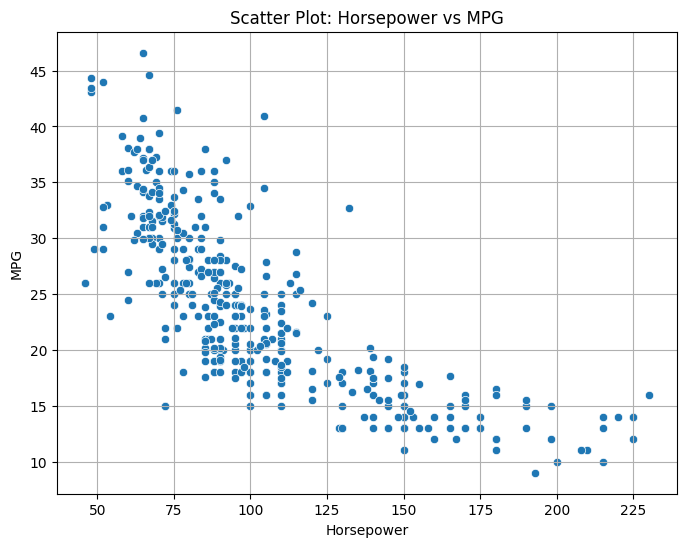

Correlation coefficient between 'horsepower' and 'mpg': -0.77


In [117]:
# Scatter plot for 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid()
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['horsepower'].corr(df['mpg'])
print(f"Correlation coefficient between 'horsepower' and 'mpg': {correlation_coefficient:.2f}")

The correlation coefficient between 'horsepower' and 'mpg' is -0.77. This indicates a strong negative correlation between the two variables. In other words, as 'horsepower' increases, 'mpg' tends to decrease, and vice versa.

A correlation coefficient of -0.77 suggests a fairly strong linear relationship. The negative sign indicates that higher values of 'horsepower' are associated with lower values of 'mpg', and the magnitude of -0.77 indicates the strength of this relationship.

8- Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7.

(Hint: This is a simple linear regression problem (one feature). Do not forget to add
x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)

The closed-form solution for simple linear regression can be expressed as:
(XTX)^-1 XTy

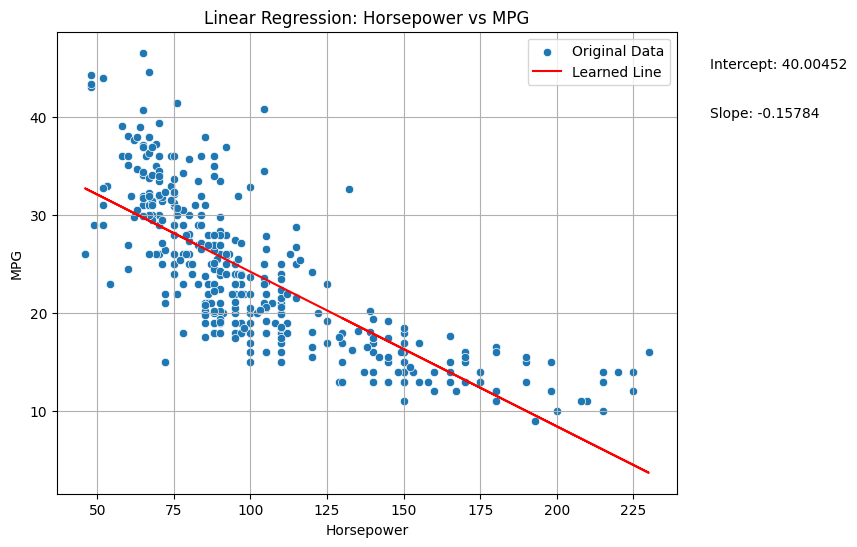

In [118]:
import numpy as np

# Adding a column of ones for the intercept (x0 = 1)
# This creates the matrix X with the first column being all ones for the intercept
X = np.column_stack((np.ones_like(df['horsepower']), df['horsepower']))
    
# Target values (response variable)
Y = df['mpg'].values

# Calculate the closed-form solution for linear regression parameters
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Scatter plot for 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, label='Original Data')

# Plot the learned line
# The learned line is represented by X @ theta, where X includes the intercept column
plt.plot(df['horsepower'], X @ theta, color='red', label='Learned Line')

intercept, slope = theta
plt.text(250, 45, f'Intercept: {intercept:.5f}')
plt.text(250, 40, f'Slope: {slope:.5f}')

plt.title('Linear Regression: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid()
plt.show()


The figure shows a scatter plot of horsepower vs. mpg, with the original data plotted in blue and the learned line plotted in red. The learned line has a negative slope, indicating that as horsepower increases, mpg decreases. This is consistent with our intuition, as more powerful cars typically have lower fuel efficiency.
The learned line does not fit the data perfectly, but it does capture the general trend.
One possible explanation for the imperfect fit is that there are other factors that influence mpg that are not included in the simple linear regression model, so they contribute to the unexplained variation in mpg.
Another possible explanation is that the relationship between horsepower and mpg is not perfectly linear. A more complex model might be able to fit the data more closely.

9- Repeat part 8 but now learn a quadratic function of the form 

f = w0 + w1x + w2x^2


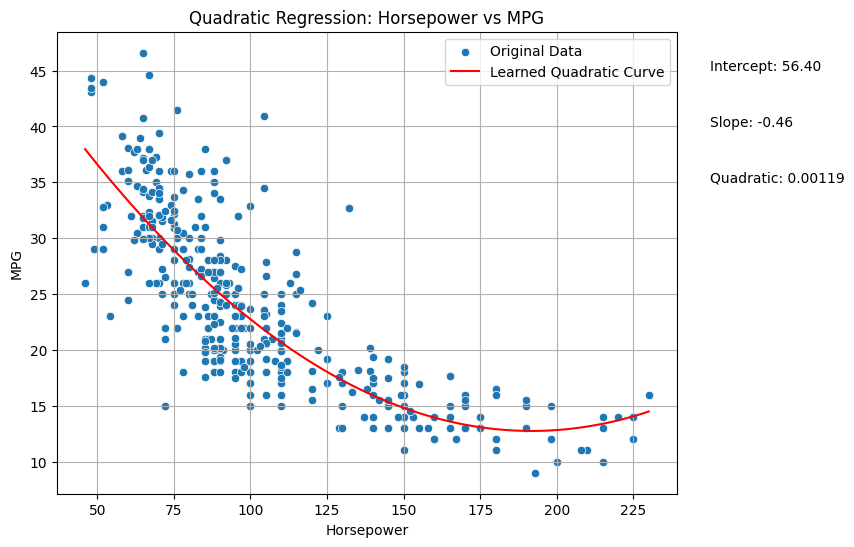

In [119]:
# Adding columns for the intercept, linear, and quadratic terms (x0 = 1, x, x^2)
# This creates the matrix X with the first column being all ones for the intercept,
# the second column for the linear term, and the third column for the quadratic term
X = np.column_stack((np.ones_like(df['horsepower']), df['horsepower'], df['horsepower']**2))

# Target values (response variable)
Y = df['mpg'].values

# Calculate the closed-form solution for quadratic regression parameters
theta_quad = np.linalg.inv(X.T @ X) @ X.T @ Y

# Scatter plot for 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, label='Original Data')

# Plot the learned quadratic curve
# The learned quadratic curve is represented by X @ theta_quad, where X includes the intercept, linear, and quadratic terms
x_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_values = theta_quad[0] + theta_quad[1] * x_values + theta_quad[2] * x_values**2
plt.plot(x_values, y_values, color='red', label='Learned Quadratic Curve')

intercept, slope, quadratic = theta_quad
plt.text(250, 45, f'Intercept: {intercept:.2f}')
plt.text(250, 40, f'Slope: {slope:.2f}')
plt.text(250, 35, f'Quadratic: {quadratic:.5f}')


plt.title('Quadratic Regression: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid()
plt.show()

The figure shows a scatter plot of horsepower vs. mpg, with the original data plotted in blue and the learned quadratic curve plotted in red. The learned quadratic curve fits the data more closely than the learned line in the previous example. This is because the quadratic curve is able to capture the curvature in the data, which is not possible with a simple linear regression model.
Overall, the quadratic regression model provides a better fit for the data than the simple linear regression model. 

10- Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.

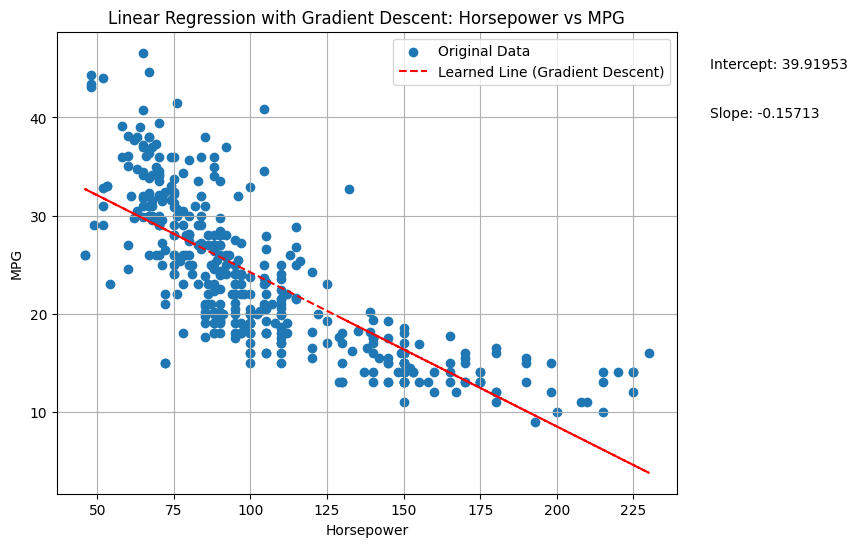

Final Parameters (Theta) using Gradient Descent: [39.91953037 -0.15712696]


In [120]:
# Function to calculate the mean squared error (cost function)
def mean_squared_error(X, Y, theta):
    m = len(Y)
    error = X @ theta - Y
    return np.sum(error**2) / (2 * m)

# Function to perform gradient descent
def gradient_descent(X, Y, theta, learning_rate, num_iterations, stopping_threshold):
    m = len(Y)
    cost_history = []
    previous_cost = None

    for i in range(num_iterations):
        # Update parameters using the gradient descent update rule
        theta = theta - (learning_rate / m) * (X.T @ (X @ theta - Y))

        # Calculate the mean squared error and append to the cost history
        cost = mean_squared_error(X, Y, theta)
        cost_history.append(cost)

        # If the change in cost is less than or equal to stopping_threshold, stop the gradient descent
        if previous_cost and abs(previous_cost - cost) <= stopping_threshold:
            break

        previous_cost = cost

    return theta, cost_history

# Add a column of ones for the intercept (x0 = 1)
X = np.column_stack((np.ones_like(df['horsepower']), df['horsepower']))
Y = df['mpg'].values

# Initial parameters (all zeros)
theta_initial = np.zeros(X.shape[1])


# Set hyperparameters
learning_rate = 0.0001  # Adjusted learning rate
num_iterations = 1000000  # Increased number of iterations
stopping_threshold = 1e-8  # Stopping threshold for gradient descent

# Perform gradient descent
theta_grad_descent, cost_history = gradient_descent(X, Y, theta_initial, learning_rate, num_iterations, stopping_threshold)

# Scatter plot for 'horsepower' vs 'mpg'
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], Y, marker='o', label='Original Data')

# Plot the learned line using gradient descent
plt.plot(X[:, 1], X @ theta_grad_descent, color='red', markerfacecolor='navy',
            markersize=10, linestyle='dashed', label='Learned Line (Gradient Descent)')

plt.title('Linear Regression with Gradient Descent: Horsepower vs MPG')

intercept, slope = theta_grad_descent
plt.text(250, 45, f'Intercept: {intercept:.5f}')
plt.text(250, 40, f'Slope: {slope:.5f}')


plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid()
plt.show()

# Print the final parameters and the final cost
print("Final Parameters (Theta) using Gradient Descent:", theta_grad_descent)


The figure showcases the training of a linear regression model using gradient descent to find the optimal parameters for predicting 'MPG' based on 'horsepower'. The plot visualizes the original data and the learned linear relationship, and the final parameters and cost are printed for evaluation. Adjustments to the learning rate, number of iterations, and stopping threshold allow fine-tuning of the gradient descent process.

the results from the Closed-Form Solution and Gradient Descent are consistent, with differences that can be attributed to the number of iterations and stopping threshold. The important takeaway is that both methods provide parameter values for the linear regression equation, and the interpretation of the relationship between 'Horsepower' and 'MPG' remains consistent.